In [1]:
# imports
import pandas as pd
import numpy as np
import os
import warnings
warnings.filterwarnings('ignore')
import matplotlib.pyplot as plt
import math
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

np.random.seed(7)

import tensorflow as tf
from tensorflow.keras import layers, callbacks
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

In [2]:
import os
os.getcwd()
os.chdir("../")
%pwd

'C:\\Users\\Lenovo\\Documents\\Masters_thesis'

In [3]:
FILE_DIR = "artifacts"
FILE_PATH = "whole_genome_mutation_rate_1e6_rounded_without_duplicates.csv"

In [4]:
data = pd.read_csv(os.path.join(FILE_DIR, FILE_PATH))
data.tail()

,AC,AT,AG,CA,CT,CG,TA,TC,TG,GA,GC,GT
7561,0.0,0.0,0.44503,0.0,1.78013,0.0,0.0,0.00000,0.0,0.89007,0.44503,0.00000
7562,0.0,0.0,0.44503,0.0,1.78013,0.0,0.0,0.44503,0.0,0.00000,0.00000,0.00000
7563,0.0,0.0,0.89007,0.0,1.78013,0.0,0.0,0.00000,0.0,0.89007,0.44503,0.89007
7564,0.0,0.0,0.44503,0.0,1.33510,0.0,0.0,0.44503,0.0,0.00000,0.00000,0.00000
7565,0.0,0.0,0.89007,0.0,4.89536,0.0,0.0,0.89007,0.0,0.00000,0.44503,0.89007


In [5]:
dataset = data.values
dataset = dataset.astype('float32')

print('Dataset Shape: ', np.shape(dataset))

Dataset Shape:  (7566, 12)


In [6]:
scaler = MinMaxScaler(feature_range=(0,1))
dataset = scaler.fit_transform(dataset)


train_size = int(len(dataset) * 0.80)
test_size = len(dataset) - train_size
train, test = dataset[0:train_size,:], dataset[train_size:len(dataset),:]
print(len(train), len(test))

6052 1514


In [7]:
def create_dataset(dataset, look_back, btch): 
    dataX, dataY = [], []
    z=0
    inc=1
    for i in range(0,len(dataset)-look_back,inc):
        a = dataset[i:(i+look_back)]
        
        dataX.append(np.reshape(a,(btch,12)))
        dataY.append(dataset[i+look_back])
#         print(a,dataY)
        z+=1
    return np.array(dataX), np.array(dataY)
 
btch=12    
look_back = 12
trainX, trainY = create_dataset(train, look_back, btch)
testX, testY = create_dataset(test, look_back, btch)

trainX = np.reshape(trainX, (trainX.shape[0], btch,12))
testX = np.reshape(testX, (testX.shape[0], btch, 12))
print(len(trainX), len(testX))

6040 1502


In [21]:
FOLDER_DIR = "final_thesis_notebooks"

# GRU

In [8]:
model = tf.keras.Sequential()
model.add(layers.GRU(500,activation='relu', input_shape=(btch, 12))) 

model.add(layers.Dense(250))
model.add(layers.Activation('relu'))
model.add(layers.Dropout(0.5))
model.add(layers.Dense(50))
model.add(layers.Activation('relu'))
model.add(layers.Dropout(0.5))
model.add(layers.Dense(12)) #softmax

model.compile(loss='mean_squared_error', optimizer=tf.keras.optimizers.Adam(learning_rate=0.00001))

# Train the model with the ModelCheckpoint callback
history = model.fit(trainX, trainY, validation_split=0.30, epochs=400, batch_size=128, verbose=2)

# Find the minimum validation loss and its respective training loss and epoch
min_val_loss = min(history.history['val_loss'])
min_val_loss_epoch = history.history['val_loss'].index(min_val_loss)
train_loss_at_min_val_loss = history.history['loss'][min_val_loss_epoch]

# Print the results
print(f"Minimum Validation Loss: {min_val_loss} at Epoch {min_val_loss_epoch}")
print(f"Training Loss at Minimum Validation Loss: {train_loss_at_min_val_loss}")

Epoch 1/400
34/34 - 23s - loss: 0.0630 - val_loss: 0.0777 - 23s/epoch - 687ms/step
Epoch 2/400
34/34 - 9s - loss: 0.0596 - val_loss: 0.0733 - 9s/epoch - 257ms/step
Epoch 3/400
34/34 - 8s - loss: 0.0567 - val_loss: 0.0690 - 8s/epoch - 246ms/step
Epoch 4/400
34/34 - 8s - loss: 0.0540 - val_loss: 0.0650 - 8s/epoch - 245ms/step
Epoch 5/400
34/34 - 8s - loss: 0.0517 - val_loss: 0.0616 - 8s/epoch - 247ms/step
Epoch 6/400
34/34 - 9s - loss: 0.0498 - val_loss: 0.0586 - 9s/epoch - 264ms/step
Epoch 7/400
34/34 - 8s - loss: 0.0483 - val_loss: 0.0561 - 8s/epoch - 249ms/step
Epoch 8/400
34/34 - 9s - loss: 0.0468 - val_loss: 0.0539 - 9s/epoch - 251ms/step
Epoch 9/400
34/34 - 9s - loss: 0.0461 - val_loss: 0.0522 - 9s/epoch - 250ms/step
Epoch 10/400
34/34 - 9s - loss: 0.0452 - val_loss: 0.0507 - 9s/epoch - 260ms/step
Epoch 11/400
34/34 - 9s - loss: 0.0444 - val_loss: 0.0495 - 9s/epoch - 256ms/step
Epoch 12/400
34/34 - 9s - loss: 0.0442 - val_loss: 0.0485 - 9s/epoch - 262ms/step
Epoch 13/400
34/34 - 9s

Epoch 101/400
34/34 - 9s - loss: 0.0311 - val_loss: 0.0324 - 9s/epoch - 251ms/step
Epoch 102/400
34/34 - 9s - loss: 0.0310 - val_loss: 0.0325 - 9s/epoch - 279ms/step
Epoch 103/400
34/34 - 8s - loss: 0.0309 - val_loss: 0.0323 - 8s/epoch - 247ms/step
Epoch 104/400
34/34 - 8s - loss: 0.0309 - val_loss: 0.0324 - 8s/epoch - 244ms/step
Epoch 105/400
34/34 - 8s - loss: 0.0309 - val_loss: 0.0325 - 8s/epoch - 245ms/step
Epoch 106/400
34/34 - 8s - loss: 0.0307 - val_loss: 0.0325 - 8s/epoch - 242ms/step
Epoch 107/400
34/34 - 8s - loss: 0.0306 - val_loss: 0.0323 - 8s/epoch - 243ms/step
Epoch 108/400
34/34 - 8s - loss: 0.0305 - val_loss: 0.0321 - 8s/epoch - 244ms/step
Epoch 109/400
34/34 - 8s - loss: 0.0306 - val_loss: 0.0322 - 8s/epoch - 249ms/step
Epoch 110/400
34/34 - 8s - loss: 0.0304 - val_loss: 0.0321 - 8s/epoch - 241ms/step
Epoch 111/400
34/34 - 8s - loss: 0.0304 - val_loss: 0.0321 - 8s/epoch - 242ms/step
Epoch 112/400
34/34 - 8s - loss: 0.0304 - val_loss: 0.0319 - 8s/epoch - 244ms/step
Epoc

Epoch 200/400
34/34 - 8s - loss: 0.0270 - val_loss: 0.0297 - 8s/epoch - 246ms/step
Epoch 201/400
34/34 - 8s - loss: 0.0268 - val_loss: 0.0297 - 8s/epoch - 247ms/step
Epoch 202/400
34/34 - 8s - loss: 0.0270 - val_loss: 0.0297 - 8s/epoch - 244ms/step
Epoch 203/400
34/34 - 8s - loss: 0.0268 - val_loss: 0.0295 - 8s/epoch - 249ms/step
Epoch 204/400
34/34 - 8s - loss: 0.0268 - val_loss: 0.0296 - 8s/epoch - 244ms/step
Epoch 205/400
34/34 - 8s - loss: 0.0269 - val_loss: 0.0294 - 8s/epoch - 244ms/step
Epoch 206/400
34/34 - 8s - loss: 0.0268 - val_loss: 0.0295 - 8s/epoch - 234ms/step
Epoch 207/400
34/34 - 8s - loss: 0.0268 - val_loss: 0.0296 - 8s/epoch - 236ms/step
Epoch 208/400
34/34 - 8s - loss: 0.0267 - val_loss: 0.0296 - 8s/epoch - 228ms/step
Epoch 209/400
34/34 - 8s - loss: 0.0267 - val_loss: 0.0295 - 8s/epoch - 227ms/step
Epoch 210/400
34/34 - 8s - loss: 0.0267 - val_loss: 0.0296 - 8s/epoch - 226ms/step
Epoch 211/400
34/34 - 8s - loss: 0.0266 - val_loss: 0.0295 - 8s/epoch - 230ms/step
Epoc

Epoch 299/400
34/34 - 8s - loss: 0.0248 - val_loss: 0.0287 - 8s/epoch - 244ms/step
Epoch 300/400
34/34 - 8s - loss: 0.0248 - val_loss: 0.0287 - 8s/epoch - 241ms/step
Epoch 301/400
34/34 - 8s - loss: 0.0247 - val_loss: 0.0287 - 8s/epoch - 246ms/step
Epoch 302/400
34/34 - 8s - loss: 0.0248 - val_loss: 0.0286 - 8s/epoch - 243ms/step
Epoch 303/400
34/34 - 8s - loss: 0.0247 - val_loss: 0.0287 - 8s/epoch - 242ms/step
Epoch 304/400
34/34 - 8s - loss: 0.0249 - val_loss: 0.0287 - 8s/epoch - 245ms/step
Epoch 305/400
34/34 - 8s - loss: 0.0247 - val_loss: 0.0287 - 8s/epoch - 242ms/step
Epoch 306/400
34/34 - 8s - loss: 0.0248 - val_loss: 0.0286 - 8s/epoch - 242ms/step
Epoch 307/400
34/34 - 8s - loss: 0.0247 - val_loss: 0.0286 - 8s/epoch - 242ms/step
Epoch 308/400
34/34 - 8s - loss: 0.0248 - val_loss: 0.0286 - 8s/epoch - 246ms/step
Epoch 309/400
34/34 - 8s - loss: 0.0248 - val_loss: 0.0287 - 8s/epoch - 245ms/step
Epoch 310/400
34/34 - 8s - loss: 0.0248 - val_loss: 0.0286 - 8s/epoch - 239ms/step
Epoc

Epoch 398/400
34/34 - 8s - loss: 0.0236 - val_loss: 0.0282 - 8s/epoch - 246ms/step
Epoch 399/400
34/34 - 8s - loss: 0.0236 - val_loss: 0.0282 - 8s/epoch - 245ms/step
Epoch 400/400
34/34 - 8s - loss: 0.0236 - val_loss: 0.0281 - 8s/epoch - 246ms/step
Minimum Validation Loss: 0.028091512620449066 at Epoch 380
Training Loss at Minimum Validation Loss: 0.023735763505101204


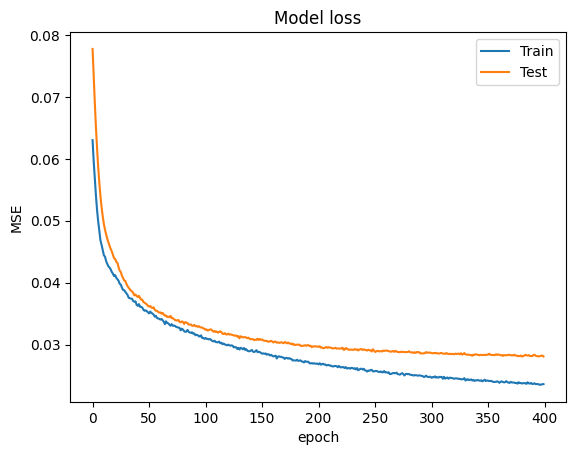

In [9]:
plt.plot(history.history['loss'])
plt.plot(np.array(history.history['val_loss']))
plt.title('Model loss')
plt.ylabel('MSE')
plt.xlabel('epoch')
plt.legend(['Train', 'Test'], loc='upper right')
#plt.savefig(os.path.join(FOLDER_DIR, "plots", 'lstm_model_loss_plot.png'), dpi=400)
plt.show()

In [10]:
trainPredict = model.predict(trainX)
testPredict = model.predict(testX)


# invert predictions

trainPredict = scaler.inverse_transform(trainPredict)
trainY = scaler.inverse_transform(trainY)
testPredict = scaler.inverse_transform(testPredict)
testY = scaler.inverse_transform(testY)

47/47 [==============================] - 3s 54ms/step


In [20]:
#calculating error

trainScore_rmse = math.sqrt(mean_squared_error(trainY, trainPredict))
print('Train RMSE: %.2f RMSE' % (trainScore_rmse))
testScore_rmse = math.sqrt(mean_squared_error(testY, testPredict))
print('Test RMSE: %.2f RMSE' % (testScore_rmse))

trainScore_mae = mean_absolute_error(trainY, trainPredict)
print('Train MAE: %.2f MAE' % (trainScore_mae))
testScore_mae = mean_absolute_error(testY, testPredict)
print('Test MAE: %.2f MAE' % (trainScore_mae))

trainScore_mse = mean_squared_error(trainY, trainPredict)
print('Train MSE: %.2f MSE' % (trainScore_mse))
testScore_mse = mean_squared_error(testY, testPredict)
print('Test MSE: %.2f MSE' % (trainScore_mse))

Train RMSE: 0.62 RMSE
Test RMSE: 0.58 RMSE
Train MAE: 0.38 MAE
Test MAE: 0.38 MAE
Train MSE: 0.38 MSE
Test MSE: 0.38 MSE


In [14]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 gru (GRU)                   (None, 500)               771000    
                                                                 
 dense (Dense)               (None, 250)               125250    
                                                                 
 activation (Activation)     (None, 250)               0         
                                                                 
 dropout (Dropout)           (None, 250)               0         
                                                                 
 dense_1 (Dense)             (None, 50)                12550     
                                                                 
 activation_1 (Activation)   (None, 50)                0         
                                                                 
 dropout_1 (Dropout)         (None, 50)                0

In [17]:
# from tensorflow.keras.utils import plot_model
# plot_model(model, to_file=os.path.join("final_thesis_notebooks", "models", "model_plot_gru.png"), 
#            show_shapes=True, show_layer_names=False, dpi='600')

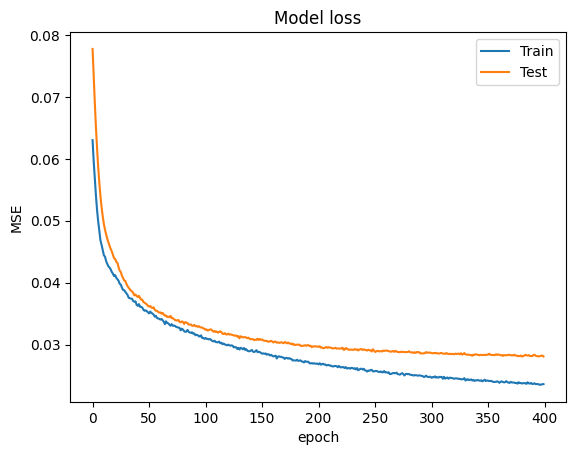

In [23]:
plt.plot(history.history['loss'])
plt.plot(np.array(history.history['val_loss']))
plt.title('Model loss')
plt.ylabel('MSE')
plt.xlabel('epoch')
plt.legend(['Train', 'Test'], loc='upper right')
plt.savefig(os.path.join(FOLDER_DIR, "plots", 'gru_model_loss_plot.png'), dpi=400)
plt.show()